In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display

# to play the audio files
from IPython.display import Audio


from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks

In [3]:
Crema_path = "files/Crema/" 
Ravdess_path ="files/audio_speech_actors_01-24/"
Savee_path = "files/Savee/"
Tess_path = "files/Tess/"

In [4]:
Crema_dir_list = os.listdir(Crema_path)
Ravdess_dir_list = os.listdir(Ravdess_path)
Savee_dir_list = os.listdir(Savee_path)
Tess_dir_list = os.listdir(Tess_path)

# Crema

In [5]:
Ex_Crema_dir_list = Crema_dir_list[:15]
Ex_Crema_dir_list

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav']

In [6]:
emotions_crema = []
paths_crema = []

for it in Crema_dir_list:
    # storing file paths
    paths_crema.append(Crema_path + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')
        
# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
# Remove rows where the 'Emotions' column is 'Unknown'
Crema_df= Crema_df[Crema_df['Emotions'] != 'Unknown']

# Reset the index if needed
Crema_df.reset_index(drop=True, inplace=True)
print(Crema_df.shape)
Crema_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})


(4900, 2)


,Emotions,Path
0,angry,files/Crema/1001_DFA_ANG_XX.wav
1,happy,files/Crema/1001_DFA_HAP_XX.wav
2,neutral,files/Crema/1001_DFA_NEU_XX.wav
3,sad,files/Crema/1001_DFA_SAD_XX.wav
4,angry,files/Crema/1001_IEO_ANG_HI.wav


In [7]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

[['angry', 'happy', 'neutral', 'sad'], ['angry', 'happy', 'neutral', 'sad']]

In [8]:
font1 = {'family':'Times New Roman','color':'blue','size':30}
font2 = {'family':'Times New Roman','color':'blue','size':20}
font3 = {'family':'Times New Roman','color':'blue','size':10}

# Ravdess

In [9]:
Ex_Ravdess_dir_list = Ravdess_dir_list[:15]
Ex_Ravdess_dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15']

That's not enough


In [10]:
emotions_ravdess = []
path_ravdess = []

for it in Ravdess_dir_list:
    # There are 20 actors  
    actor = os.listdir(Ravdess_path + it)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        emotions_ravdess.append(int(part[2]))
        path_ravdess.append(Ravdess_path + it + '/' + file)
    
    
emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
Ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'Unknown',
                             3:'happy', 4:'sad', 5:'angry',
                             6:'Unknown', 7:'Unknown', 8:'Unknown'}, inplace=True)
Ravdess_df = Ravdess_df[Ravdess_df['Emotions'] != 'Unknown']

# Reset the index if necessary
Ravdess_df.reset_index(drop=True, inplace=True)
Ravdess_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

,Emotions,Path
0,neutral,files/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
1,neutral,files/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav
2,neutral,files/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav
3,neutral,files/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav
4,happy,files/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav


In [11]:
[Ravdess_df["Emotions"].unique().tolist() for i in Ravdess_df.columns]

[['neutral', 'happy', 'sad', 'angry'], ['neutral', 'happy', 'sad', 'angry']]

# Savee

In [12]:
Ex_Savee_dir_list = Savee_dir_list[:15]
Ex_Savee_dir_list

['DC_a01.wav',
 'DC_a02.wav',
 'DC_a03.wav',
 'DC_a04.wav',
 'DC_a05.wav',
 'DC_a06.wav',
 'DC_a07.wav',
 'DC_a08.wav',
 'DC_a09.wav',
 'DC_a10.wav',
 'DC_a11.wav',
 'DC_a12.wav',
 'DC_a13.wav',
 'DC_a14.wav',
 'DC_a15.wav']

In [13]:
emotions_savee = []
path_savee = []

for it in Savee_dir_list:
    path_savee.append(Savee_path + it)
    part = it.split('_')[1]
    part = part[:-6]
    if part == 'a':
        emotions_savee.append('angry')
    elif part == 'h':
        emotions_savee.append('happy')
    elif part == 'n':
        emotions_savee.append('neutral')
    elif part == 'sa':
        emotions_savee.append('sad')
    else:
        emotions_savee.append('Unknown')
        
# dataframe for emotion of files
emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

# dataframe for path of files.
path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
Savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)
# Remove rows where 'Emotions' column has the value 'Unknown'
Savee_df = Savee_df[Savee_df['Emotions'] != 'Unknown'].reset_index(drop=True)

Savee_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

,Emotions,Path
0,angry,files/Savee/DC_a01.wav
1,angry,files/Savee/DC_a02.wav
2,angry,files/Savee/DC_a03.wav
3,angry,files/Savee/DC_a04.wav
4,angry,files/Savee/DC_a05.wav


In [14]:
[Savee_df["Emotions"].unique().tolist() for i in Savee_df.columns]

[['angry', 'happy', 'neutral', 'sad'], ['angry', 'happy', 'neutral', 'sad']]

# Tess

In [15]:
Ex_Tess_dir_list = Tess_dir_list[:15]
Ex_Tess_dir_list

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [17]:
emotions_tess = []
path_tess = []

for it in Tess_dir_list:
    directories = os.listdir(Tess_path + '/' + it)
    for file in directories:
        part = file.split('.')[0]
        parts = part.split('_')  # Split by underscore

        if len(parts) > 2:  # Ensure there are at least 3 parts
            part = parts[2]
            if part == 'ps':
                emotions_tess.append('unknown')
            elif part == 'disgust':
                emotions_tess.append('unknown')
            elif part == 'fear':
                emotions_tess.append('unknown')
            else:
                emotions_tess.append(part)
        else:
            emotions_tess.append('unknown')  # Handle cases where the expected format isn't followed

        path_tess.append(Tess_path + it + '/' + file)

# dataframe for emotion of files
emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

# dataframe for path of files.
path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
Tess_df = Tess_df[Tess_df['Emotions'] != 'unknown'].reset_index(drop=True)
Tess_df.head().style.set_properties(**{'background-color': '#9490ff',
                                       'color': 'black',
                                       'border-color': 'black'})


,Emotions,Path
0,angry,files/Tess/OAF_angry/OAF_back_angry.wav
1,angry,files/Tess/OAF_angry/OAF_bar_angry.wav
2,angry,files/Tess/OAF_angry/OAF_base_angry.wav
3,angry,files/Tess/OAF_angry/OAF_bath_angry.wav
4,angry,files/Tess/OAF_angry/OAF_bean_angry.wav


In [18]:
[Tess_df["Emotions"].unique().tolist() for i in Tess_df.columns]

[['angry', 'happy', 'neutral', 'sad'], ['angry', 'happy', 'neutral', 'sad']]

In [19]:
Sum_df = pd.concat([Crema_df, Ravdess_df, Savee_df, Tess_df], axis = 0)
Sum_df.to_csv("Sum_df.csv",index=False)
Sum_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

,Emotions,Path
0,angry,files/Crema/1001_DFA_ANG_XX.wav
1,happy,files/Crema/1001_DFA_HAP_XX.wav
2,neutral,files/Crema/1001_DFA_NEU_XX.wav
3,sad,files/Crema/1001_DFA_SAD_XX.wav
4,angry,files/Crema/1001_IEO_ANG_HI.wav


In [20]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

[['angry', 'happy', 'neutral', 'sad'], ['angry', 'happy', 'neutral', 'sad']]

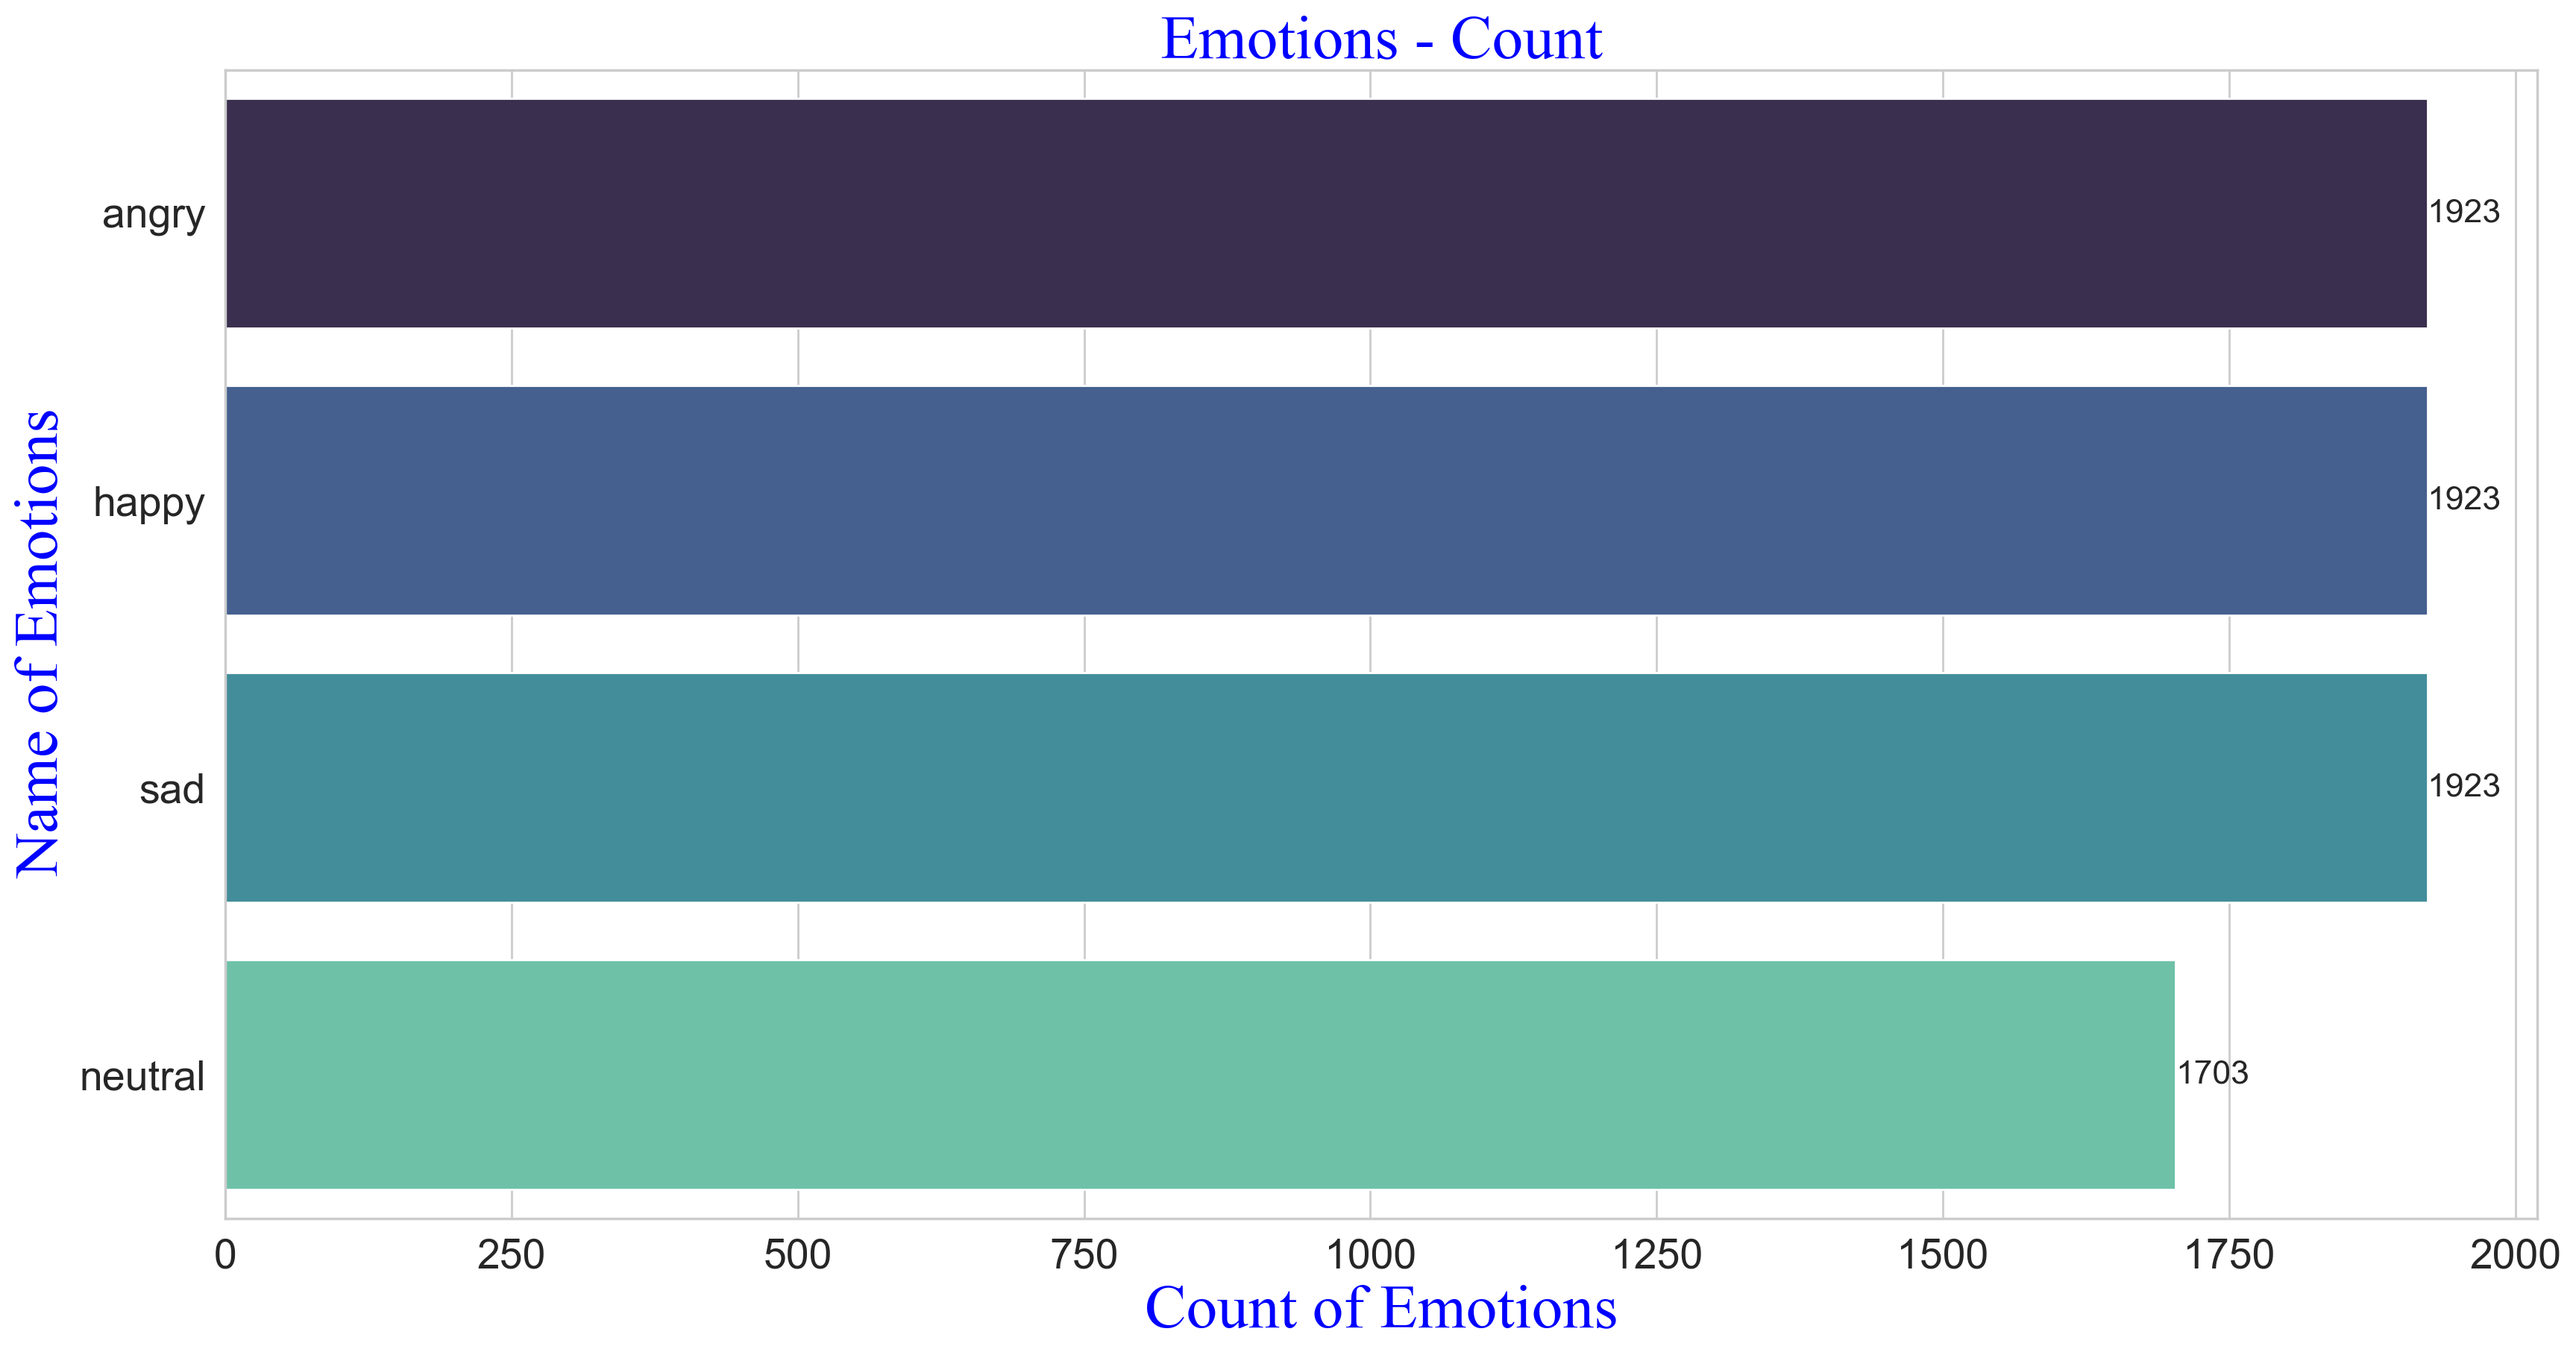

In [21]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions", fontdict= font1)
plt.xlabel("Count of Emotions", fontdict= font1)
plt.title("Emotions - Count", fontdict= font1)
plt.show()

In [23]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

[['angry', 'happy', 'neutral', 'sad'], ['angry', 'happy', 'neutral', 'sad']]

In [25]:
from tqdm import tqdm  # Import tqdm for progress bar
import librosa

# Initialize an empty list to store audio arrays
audio_arrays = []

# Iterate over the paths in 'Sum_df_rep' with a progress bar
for i in tqdm(Sum_df['Path'], desc="Processing audio files"):
    y, sr = librosa.load(i, sr=44100)  # Load the audio file
    audio_arrays.append(y)  # Append the loaded audio array to the list

# Add the new list to the DataFrame
Sum_df['Arrays'] = audio_arrays


Processing audio files: 100%|██████████| 7472/7472 [40:53<00:00,  3.05it/s]  


In [26]:
Sum_df.head().style.set_properties(**{'background-color': '#9490ff',
                           'color': 'black',
                           'border-color': 'black'})

,Emotions,Path,Arrays
0,angry,files/Crema/1001_DFA_ANG_XX.wav,[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.0702407e-06 6.3696680e-06 0.0000000e+00]
1,happy,files/Crema/1001_DFA_HAP_XX.wav,[-0.0040581 -0.00442315 -0.00405369 ... -0.00021015 -0.00014664 0. ]
2,neutral,files/Crema/1001_DFA_NEU_XX.wav,[ 2.2653900e-03 2.3158076e-03 1.9148014e-03 ... -1.7817781e-04 -6.1301071e-05 0.0000000e+00]
3,sad,files/Crema/1001_DFA_SAD_XX.wav,[0.00261202 0.00293529 0.00281563 ... 0. 0. 0. ]
4,angry,files/Crema/1001_IEO_ANG_HI.wav,[-1.17812735e-04 -4.01340250e-04 -5.74032194e-04 ... 5.31186561e-06 -2.21210230e-05 0.00000000e+00]


In [33]:
happy_sp = Sum_df[Sum_df['Emotions'] == 'happy']['Path']
happy_arr = Sum_df[Sum_df['Emotions'] == 'happy']['Arrays']

In [35]:
sad_sp = Sum_df[Sum_df['Emotions'] == 'sad']['Path']
sad_arr = Sum_df[Sum_df['Emotions'] == 'sad']['Arrays']

In [36]:
angry_sp = Sum_df[Sum_df['Emotions'] == 'angry']['Path']
angry_arr = Sum_df[Sum_df['Emotions'] == 'angry']['Arrays']

In [37]:
neutral_sp = Sum_df[Sum_df['Emotions'] == 'neutral']['Path']
neutral_arr = Sum_df[Sum_df['Emotions'] == 'neutral']['Arrays']

In [38]:
sample_duration = 1/sr
print(sample_duration)

2.2675736961451248e-05


In [39]:
#duration of the audio signals in seconds
duration = sample_duration * len(audio_arrays)
print(f"Duration of signal is: {duration:.2f} seconds")

Duration of signal is: 0.17 seconds


In [40]:
Frame_size = 1024
#HOP =  Current frame how many samples shift to the right for calculating the next frame
Hop_lenght = 512 

#calculate the amplitude envelope

def amplitude_env (signal, frame_size, hop_length):
    amplitude_envelope = []
    
    #calculate AE (Amp Env) for each frame
    for i in range (0, len(signal), hop_length):
        current_frame_amplitude_env = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_env)
        
    return np.array(amplitude_envelope)


def fancy_amplitude_env (signal, frame_size, hop_length):
    
    return np.array([max(signal[i:i+frame_size]) for i in range(0, signal.size, hop_length)])

In [41]:
# Samples
Sp_happy= happy_arr.iloc[0]
Sp_sad = sad_arr.iloc[0]
Sp_neutral = neutral_arr.iloc[0]
Sp_angry = angry_arr.iloc[0]

In [42]:

AE_happy = amplitude_env(Sp_happy, Frame_size, Hop_lenght)
AE_sad = amplitude_env(Sp_sad, Frame_size, Hop_lenght)
AE_neutral = amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
AE_angry = amplitude_env(Sp_angry, Frame_size, Hop_lenght)

print( len(AE_angry), len(AE_happy), len(AE_neutral), len(AE_sad))


197 161 176 173


In [43]:

fancy_AE_happy = fancy_amplitude_env(Sp_happy, Frame_size, Hop_lenght)
fancy_AE_sad = fancy_amplitude_env(Sp_sad, Frame_size, Hop_lenght)
fancy_AE_neutral = fancy_amplitude_env(Sp_neutral, Frame_size, Hop_lenght)
fancy_AE_angry = fancy_amplitude_env(Sp_angry, Frame_size, Hop_lenght)

print( len(fancy_AE_angry),
      len(fancy_AE_happy), len(fancy_AE_neutral),len(fancy_AE_sad))

197 161 176 173


In [45]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data



def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)


# taking any example and checking for techniques.
path = np.array(Sum_df.Path)[1]
data, sample_rate = librosa.load(path)

In [48]:
Crema_df

,Emotions,Path
0,angry,files/Crema/1001_DFA_ANG_XX.wav
1,happy,files/Crema/1001_DFA_HAP_XX.wav
2,neutral,files/Crema/1001_DFA_NEU_XX.wav
3,sad,files/Crema/1001_DFA_SAD_XX.wav
4,angry,files/Crema/1001_IEO_ANG_HI.wav
...,...,...
4895,sad,files/Crema/1091_TSI_SAD_XX.wav
4896,angry,files/Crema/1091_WSI_ANG_XX.wav
4897,happy,files/Crema/1091_WSI_HAP_XX.wav
4898,neutral,files/Crema/1091_WSI_NEU_XX.wav


In [49]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [50]:
extract_mfcc(Crema_df['Path'][0])

array([-3.2686218e+02,  1.3193694e+02, -2.2300175e+01,  4.7366234e+01,
       -8.6453772e+00,  1.6426687e+01, -2.3571976e+01, -4.6153426e+00,
       -9.4483004e+00, -4.2352753e+00, -9.3214989e+00, -5.1042514e+00,
       -2.6365563e-01, -1.7497593e+01,  1.1547095e+01, -1.3623844e+01,
       -6.8494811e+00, -1.6621085e+00, -3.5109637e+00, -6.6830435e+00,
       -9.2853546e+00, -2.4452848e+00, -1.0247077e+01, -1.0389091e+00,
       -5.0882840e+00,  2.2761056e+00, -4.1292558e+00, -2.6244586e+00,
       -5.5327290e-01, -4.6525426e+00,  5.5967855e-01, -3.8815165e+00,
        7.4732512e-01, -4.2431264e+00, -4.1209807e+00, -5.8962879e+00,
       -4.5208874e+00, -3.4234977e+00, -4.2517080e+00, -1.5987728e+00],
      dtype=float32)

In [51]:
from tqdm import tqdm

# Add progress bar using tqdm
# Note: Use `tqdm.pandas()` to enable progress_apply on Pandas DataFrame
tqdm.pandas(desc="Extracting MFCCs")

# Apply the function with progress bar
X_mfcc = Crema_df['Path'].progress_apply(lambda x: extract_mfcc(x))


Extracting MFCCs: 100%|██████████| 4900/4900 [12:55<00:00,  6.32it/s]


In [52]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(4900, 40)

In [53]:
## input split
X = np.expand_dims(X, -1)
X.shape

(4900, 40, 1)

In [54]:
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Emotions']])

In [55]:
y = y.toarray()

In [77]:
print(enc.fit_transform(Crema_df[['Emotions']]).toarray())
print(Crema_df['Emotions'].unique())

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
['angry' 'happy' 'neutral' 'sad']


In [57]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')  # Change to 4 if you have 4 classes
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
print(Iterable)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 2

In [58]:
print(type(X), type(y))  # Should be <class 'numpy.ndarray'> or <class 'tensorflow.python.framework.ops.Tensor'>


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [59]:
print(X.shape, y.shape)  # Check if shapes are compatible


(4900, 40, 1) (4900, 4)


In [60]:
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model.fit(X, y, validation_split=0.2, epochs=500, batch_size=64)

Epoch 1/500
62/62 [==============================] - 27s 367ms/step - loss: 1.2838 - accuracy: 0.3643 - val_loss: 1.1776 - val_accuracy: 0.4745
Epoch 2/500
62/62 [==============================] - 20s 315ms/step - loss: 1.0761 - accuracy: 0.4926 - val_loss: 1.2410 - val_accuracy: 0.4398
Epoch 3/500
62/62 [==============================] - 18s 296ms/step - loss: 1.0390 - accuracy: 0.5102 - val_loss: 1.0869 - val_accuracy: 0.4714
Epoch 4/500
62/62 [==============================] - 20s 322ms/step - loss: 0.9685 - accuracy: 0.5653 - val_loss: 1.1341 - val_accuracy: 0.5041
Epoch 5/500
62/62 [==============================] - 22s 355ms/step - loss: 0.9606 - accuracy: 0.5719 - val_loss: 1.3963 - val_accuracy: 0.4143
Epoch 6/500
 5/62 [=>............................] - ETA: 16s - loss: 1.0170 - accuracy: 0.5281

KeyboardInterrupt: 

In [73]:
model.save('speech_emotion_model.h5')
print("Model saved as 'speech_emotion_model.h5'")

Model saved as 'speech_emotion_model.h5'


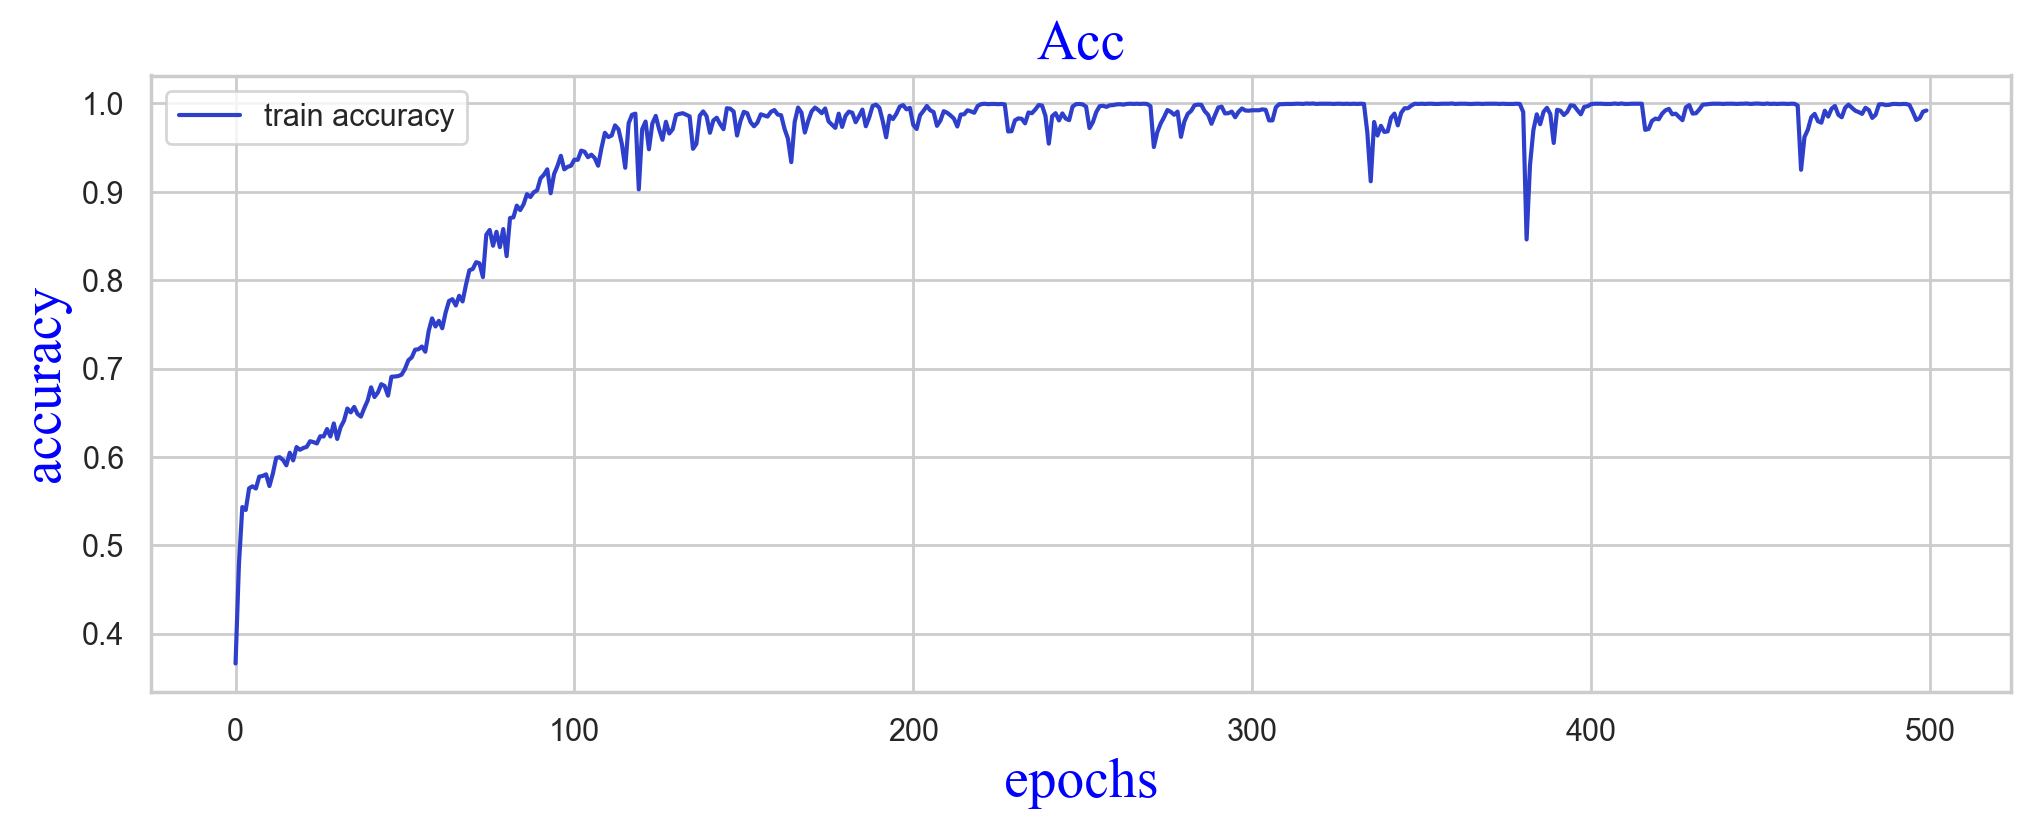

In [74]:
epochs = list(range(500))
acc = history.history['accuracy']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('accuracy', fontdict= font2)
plt.title('Acc', fontdict= font2)
plt.legend()
plt.show()

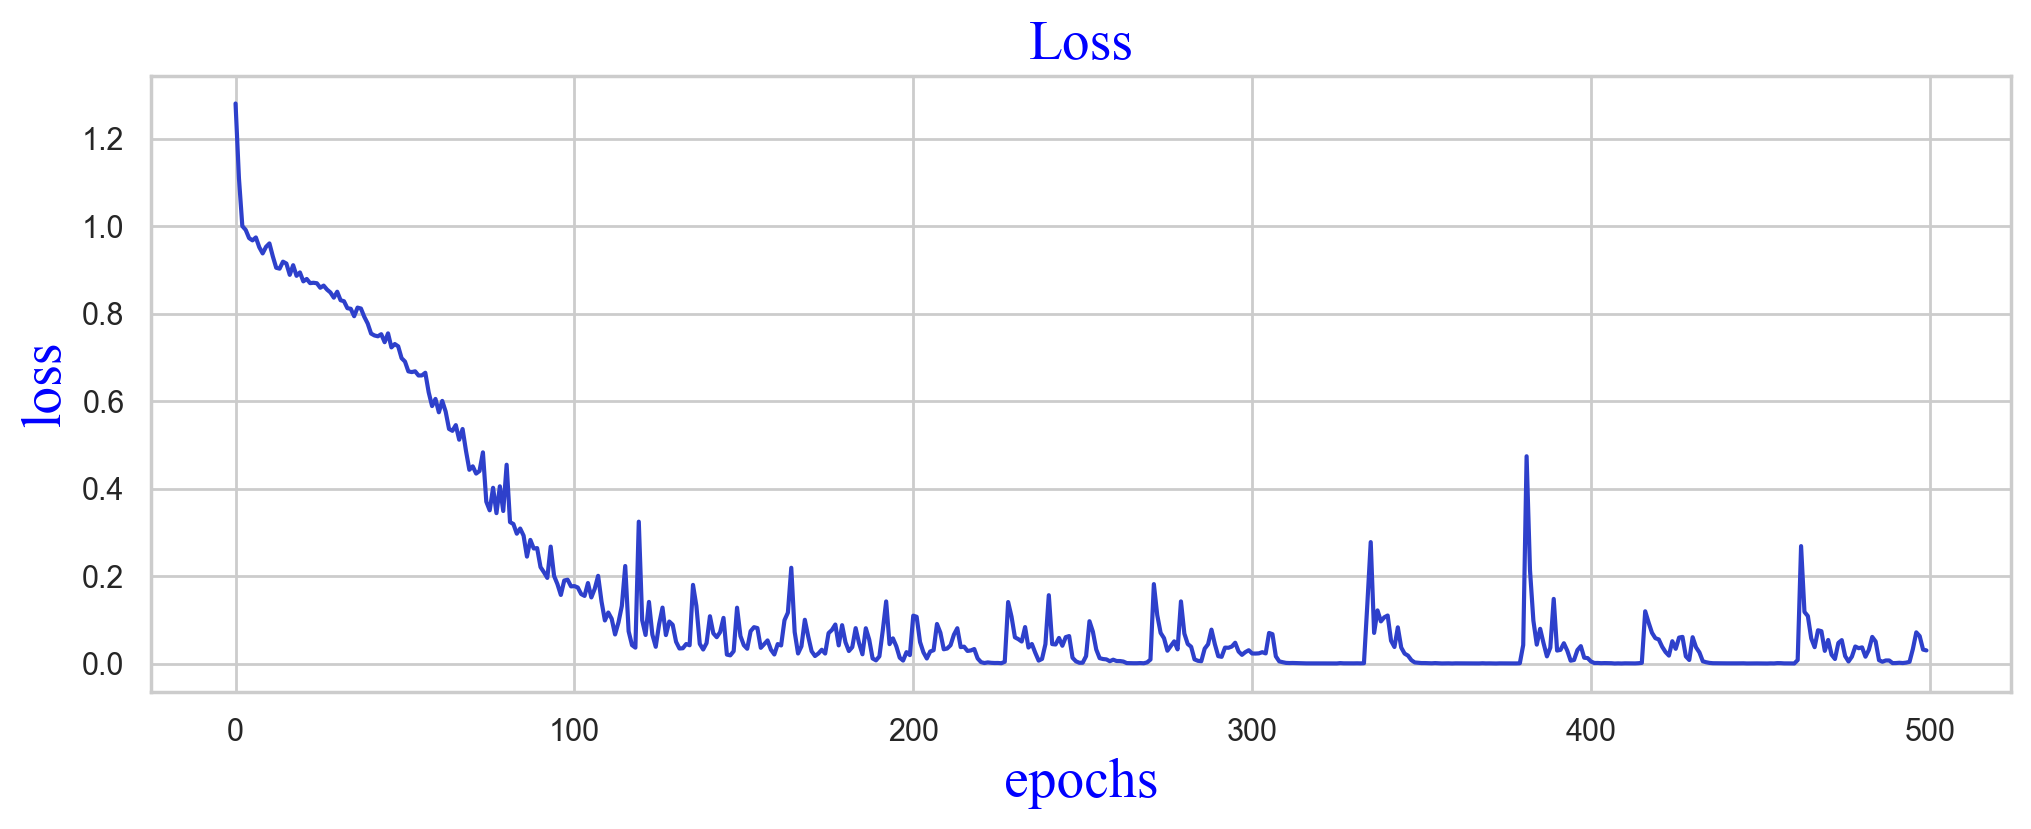

In [75]:
loss = history.history['loss']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, loss, label='train loss', color='#2E40CB')
plt.xlabel('epochs', fontdict= font2)
plt.ylabel('loss', fontdict= font2)
plt.title('Loss', fontdict= font2)
plt.show()